![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjFm003pSAOtHmnUm7e--Xquwo90Hp5-U_3wSZrkChGz4tQYWZ)
# Introduction to Machine Learning
##Lab 4: Regularization, Cross-validation, KNN, Naive Bayes

It this lab you will try multiple things. The main outcome should be to see regularization impact. You will also learn to use cross-validation. In addition you will use two more machine learning algorithms: KNN and Naive Bayes.


In [0]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Regularization

Let's start from generating data.

Define input array with angles from 60° to 300° converted to radians

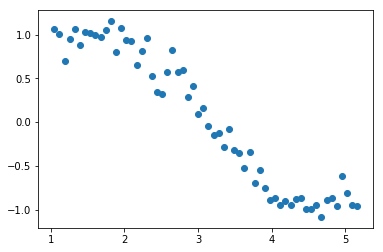

In [0]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
plt.scatter(x, y)

This function returns polynomial regression coefficiets.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def linear_regression(x, y, power, models_to_plot):
    ''' Caclulates polynomial regression
    param: x, y - data
    param: power - polynom degree
    param: models_to_plot - details for visualization process
    return: intercept, linear_regression_coeffitients - model coefficients
    '''
    ### START CODE HERE ###  
    #initialize predictors:
    poly = PolynomialFeatures(power, include_bias=False)
    X_poly = poly.fit_transform(x.reshape(-1, 1))

    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(X_poly, y)
    y_pred = linreg.predict(X_poly)
    
    ### END CODE HERE ###
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.scatter(x,y)
        plt.plot(x, y_pred, color='r') #calculate y_pred on training dataset
        plt.title('Plot for power: %d'%power)

    return linreg.intercept_, linreg.coef_

Now let's check, that polynomial regression works correctly.

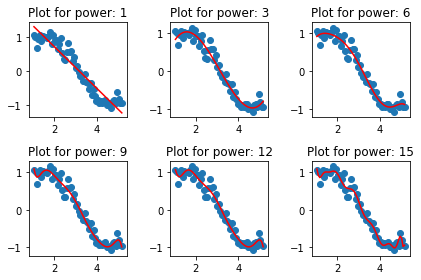

In [0]:
#Initialize a dataframe to store the results:
col = ['intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    intercept, coef = linear_regression(x, y, power=i, models_to_plot=models_to_plot)
    coef_matrix_simple.iloc[i-1,0] = intercept
    coef_matrix_simple.iloc[i-1,1:1+len(coef)] = coef

Let's look to the coefficients. You should see, that for large degrees coefficients absolute values increase.

In [0]:
coef_matrix_simple

,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,1.96286,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.91406,-0.582551,-0.00595874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,-1.0807,3.03157,-1.28553,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,-0.265704,1.68692,-0.531752,-0.0356785,0.0139192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,2.9915,-5.11776,4.72461,-1.92856,0.334735,-0.0206533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,-2.80155,9.51665,-9.7132,5.22609,-1.55489,0.233099,-0.0136132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,19.3021,-55.9523,68.9562,-44.6319,16.5148,-3.52814,0.40451,-0.0192269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,43.1676,-137.013,183.825,-133.499,57.6767,-15.2527,2.41654,-0.210019,0.00767667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.7577,-5.2208,0.421902,-0.0148148,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,137.717,-486.125,726.133,-595.881,293.256,-87.4563,14.5462,-0.806073,-0.138205,0.0262231,-0.00132096,NaN,NaN,NaN,NaN,NaN


###L2 regularization.

Learn Ridge regression for polynomial features with degree 15.

In [0]:
##### Ridge Regression
from sklearn.linear_model import Ridge
def ridge_regression(x, y, alpha, models_to_plot, degree=15):
    ### START CODE HERE ### 
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
      
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(X_poly, y)
    y_pred = ridgereg.predict(X_poly)
    
    ### END CODE HERE ###
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.scatter(x, y)
        plt.plot(x, y_pred, color='r')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    return ridgereg.intercept_, ridgereg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.66381e-17): result may not be accurate.
  overwrite_a=True).T


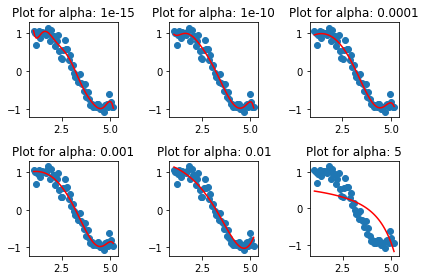

In [0]:
#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha for i, alpha in enumerate(alpha_ridge)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i, alpha in enumerate(alpha_ridge):
    intercept, coef = ridge_regression(x, y, alpha, models_to_plot)
    coef_matrix_ridge.iloc[i-1,0] = intercept
    coef_matrix_ridge.iloc[i-1,1:1+len(coef)] = coef

In [0]:
coef_matrix_ridge

,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,11.1701,-28.9629,31.0694,-15.2353,2.89183,0.169364,-0.091002,-0.0108382,0.00198377,0.00063697,2.40849e-05,-2.00114e-05,-4.20369e-06,2.19357e-07,2.2729e-07,-2.3374e-08
alpha_1e-10,1.33999,-1.53065,1.74946,-0.680458,0.038843,0.0158179,0.00015918,-0.00035954,-5.37182e-05,-2.91013e-07,1.08091e-06,1.89389e-07,1.96191e-08,3.92864e-09,8.19001e-10,-4.62722e-10
alpha_1e-08,0.56132,0.546549,-0.128142,-0.025713,-0.00282024,-0.000110299,4.0575e-05,1.52075e-05,3.65239e-06,7.36585e-07,1.30351e-07,1.9445e-08,1.93533e-09,-1.30259e-10,-1.54943e-10,-6.17707e-11
alpha_0.0001,0.817638,0.305147,-0.0866873,-0.0204755,-0.00283643,-0.000219199,1.81203e-05,1.2399e-05,3.42971e-06,7.28224e-07,1.29346e-07,1.86865e-08,1.70622e-09,-1.5108e-10,-1.40448e-10,-5.16034e-11
alpha_0.001,1.29889,-0.0883959,-0.0515001,-0.010099,-0.00141244,-0.000131521,7.23082e-07,4.13617e-06,1.30478e-06,2.96417e-07,5.6157e-08,8.97185e-09,1.09406e-09,4.29249e-11,-3.14226e-11,-1.48705e-11
alpha_0.01,0.968886,-0.139008,-0.019268,-0.00300434,-0.000465519,-6.97006e-05,-9.90064e-06,-1.29236e-06,-1.42846e-07,-9.33025e-09,1.30688e-09,7.8035e-10,2.40231e-10,6.15627e-11,1.44581e-11,3.22713e-12
alpha_1,0.54826,-0.0588687,-0.00852167,-0.00141945,-0.000241004,-4.08318e-05,-6.87431e-06,-1.14898e-06,-1.90534e-07,-3.13146e-08,-5.09188e-09,-8.16953e-10,-1.28804e-10,-1.98296e-11,-2.95006e-12,-4.16233e-13
alpha_5,0.400342,-0.0372364,-0.00552679,-0.000949634,-0.000167292,-2.95811e-05,-5.23032e-06,-9.24527e-07,-1.63445e-07,-2.89111e-08,-5.11838e-09,-9.07113e-10,-1.60954e-10,-2.85942e-11,-5.08624e-12,-9.05846e-13
alpha_10,0.276703,-0.0224693,-0.00340492,-0.000599344,-0.000108458,-1.9744e-05,-3.60077e-06,-6.57576e-07,-1.2028e-07,-2.20428e-08,-4.04814e-09,-7.45085e-10,-1.37447e-10,-2.54123e-11,-4.70877e-12,-8.7438e-13
alpha_20,94.751,-299.916,380.578,-237.501,67.0169,0.156008,-4.53663,0.587033,0.146857,-0.0244735,-0.00555068,0.000878771,0.000194673,-4.9154e-05,3.21625e-06,-3.9243e-08


You should see, that coefficients reduced with increased regularization.

###L1 regularization

Train Lasso regression. It also makes a regualrization, but comparing to L2, coefficients became 0.

In [0]:
###### Lasso Regression
from sklearn.linear_model import Lasso
def lasso_regression(x, y, alpha, models_to_plot, degree=15):
    ### START CODE HERE ###
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(X_poly, y)
    y_pred = lassoreg.predict(X_poly)
    
    ### END CODE HERE ###
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.scatter(x, y)
        plt.plot(x, y_pred, color='r')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    return lassoreg.intercept_, lassoreg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4783573825904089, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47828183990566436, tolerance: 0.00369480384218441
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4707933019042263, tolerance: 0.00369480384218441
  positive)


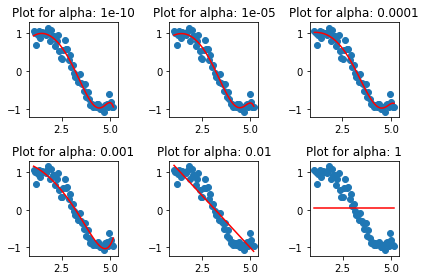

In [0]:
#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    intercept, coef = lasso_regression(x, y, alpha_lasso[i], models_to_plot)

    coef_matrix_lasso.iloc[i-1,0] = intercept
    coef_matrix_lasso.iloc[i-1,1:1+len(coef)] = coef

Let's look how many coefficients became zeros.

In [0]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      8
alpha_1e-05     10
alpha_0.0001    12
alpha_0.001     13
alpha_0.01      15
alpha_1         15
alpha_5         15
alpha_10         0
dtype: int64

## Cross-validation

Using cross-validation in code is very simple. Use *cross_val_score* from *sklearn.model_selection*.

Load wine dataset and train Gaussian Naive Bayes algorithm on it. Use sklearn implementatioin, you will do your own later.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB

wine = load_wine()

### START CODE HERE ###
gnb = GaussianNB()
scores = cross_val_score(gnb, wine.data, wine.target, cv=10)
print(scores)
### END CODE HERE ###

[0.89473684 0.88888889 1.         0.94444444 0.94444444 1.
 1.         0.94444444 1.         1.        ]


## KNN classifier

In this task you will implement the whole set of methods for KNN classifier.

Let's start from generating data.

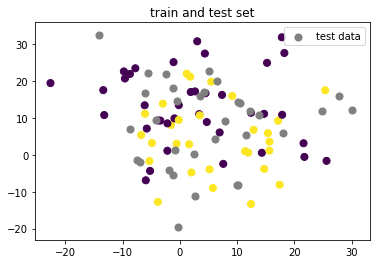

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split


data, labels = make_blobs(n_samples=100, centers=2, cluster_std=10.0, center_box=(-30.0, 30.0), n_features=2, random_state=0)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.33, random_state=42)

plt.scatter(train_data[:,0], train_data[:,1], c = train_labels, s = 50, marker  = 'o')
plt.scatter(test_data[:,0], test_data[:,1], c = 'gray', s = 50, marker  = 'o', label = 'test data')
plt.legend()
plt.title('train and test set')
plt.show()

Now implement your methods

In [0]:
import numpy as np
import operator
import math
class KNN:
    def __init__(self, k):
        """
        param: k: number of nearest neighbors to consider
        """
        self.k = k
    @staticmethod
    def get_distance(X, Y):
        """
        implement euclidean distance
        param: X, Y - vectors of the same size to calculate distance between
        return: number 
        """
        ### START CODE HERE ### 
        distance = 0
        for x in range(len(X)):
            distance += pow((X[x] - Y[x]), 2)
        return math.sqrt(distance)
        ### END CODE HERE ###
    def get_k_neighbors(self, test_sample):
        """
        finds k closest to test example data points from train set
        use get_distance method to calculate distanses between data points
        param: self.train_data: n-dimentional train set
        param: self.train_labels: class label of training data
        param: test_sample: sample to be classified
        param: self.k: number of nearest neighbors to consider
        return: list of labels of k closest to test sample points
        """
        ### START CODE HERE ### 
        distances = []
        for x in range(self.train_data.shape[0]):
            dist = self.get_distance(test_sample, self.train_data[x])
            distances.append((dist, self.train_labels[x]))
        distances.sort()
        neighbors = []
        for x in range(self.k):
            neighbors.append(distances[x][1])
        return neighbors
        ### END CODE HERE ###
    @staticmethod
    def get_class_label(neighbors):
        """
        selects most frequent class
        param: neighbors: list of labels of k closest data points
        return: class label
        """
        ### START CODE HERE ### 
        labels, counts = np.unique(neighbors, return_counts = True)                       
        idx = np.argsort(counts)[-1]        
        return labels[idx]
        ### END CODE HERE ###
    def fit(self, train_data, train_labels):
        """
        fit classifier, e.g. get training data
        """
        self.train_data = train_data
        self.train_labels = train_labels
    def predict(self, test_data):
        """
        predicts class labels for test data points
        param: test_data: list of data points to be classified
        return: predictions
        """
        predictions = []
        for x in test_data:
            neighbors = self.get_k_neighbors(x)
            label = self.get_class_label(neighbors)
            predictions.append(label)
        return predictions

### Run classifier on binary data

In [0]:
from sklearn.metrics import accuracy_score

# create an instance of the classifier with five neighbors
knn = KNN(5)
# fir classifier
knn.fit(train_data, train_labels)
# predict for test data
predictions = knn.predict(test_data)

accuracy_score(test_labels, predictions)

0.6060606060606061

## Gaussian Naive Bayes

Let's implement it ourselves. On train phase you have to estimate parameters of likelihood and prior distribution.

To predict a label, you don't need to caclulate data probability. Use pdf values of estimated probabilities to find maximum aposteriori probability.

In [0]:
import numpy as np
from scipy.stats import norm


class GaussianNB:
    def fit(self, X_train, y_train):
        """
        fit classifier, e.g. get training data
        """
        ### START CODE HERE ###

        self.labels, counts_elements = np.unique(y_train, return_counts=True)

        features = X_train.shape[1]
        classes = len(y_train)

        self.prior = counts_elements / len(y_train)
        self.mean = np.zeros((classes, features))
        self.std = np.zeros((classes, features))

        for j in range(features):
            x_j = X_train[:, j]
            for i in range(classes):
                if (y_train == i).any():
                    x_ij = x_j[y_train == i]
                    self.mean[i, j] = np.mean(x_ij)
                    self.std[i, j] = np.std(x_ij)

        ### END CODE HERE ###

    def predict(self, X_test):
        """
        predicts class labels for test data points
        param: test_data: list of data points to be classified
        return: predictions
        """
        ### START CODE HERE ###
        objects = X_test.shape[0]
        features = X_test.shape[1]
        classes = len(self.labels)

        aposteriori = np.zeros((objects, classes))
        for i in range(objects):
            for j in range(classes):
                aposteriori[i, j] = self.prior[j]
                for k in range(features):
                    aposteriori[i, j] *= norm.pdf(X_test[i, k], self.mean[j, k], self.std[j, k])

        predictions = np.argmax(aposteriori, axis=1)

        labels = self.labels[predictions]
        ### END CODE HERE ###

        return labels

Check it on wine dataset

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9444444444444444
